## Visualizations of database USAD

First, we install the libraries we're going to use: 

In [1]:
!pip install SQLAlchemy 
!pip install psycopg2-binary
pip install seaborn

     |████████████████████████████████| 3.0 MB 66 kB/s             


And we import them:

In [2]:
import psycopg2 as pg
import pandas as pd
import matplotlib
import seaborn as sns

We connect to the database: 

In [3]:
conn = pg.connect(host='postgres', database='postgres', user='postgres', password='postgres')

### Visualizations: 

First Visualization: **Number of publications for each journal**

In [4]:
v_1 = pd.read_sql("SELECT journal, COUNT(journal) as number_of_publications FROM data_src GROUP BY journal", conn)

In [5]:
v_1 #Data for visualization 1

,journal,number_of_publications
0,J Food Qual,1
1,Journal of Agriculture and Food Chemistry,1
2,J Agr Food Chem,4
3,Z. Lebensm Unters Forsch A,1
4,"Food and Drug Bulletin No. 134, North Dakota S...",1
...,...,...
72,J. Food Sci.,1
73,Home Economics Research Report Number 48,1
74,Cereal Foods World,1
75,Food Science and Technology,1


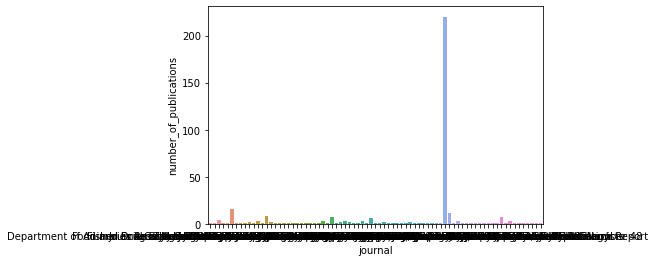

In [13]:
sns.barplot(x="journal", y="number_of_publications", data=v_1);

Second Visualization: **Number of publications per year**

In [6]:
v_2 = pd.read_sql("SELECT year, COUNT(title) as number_of_publications FROM data_src WHERE year is not Null GROUP BY year", conn)

In [7]:
v_2 #Data for visualization 2

,year,number_of_publications
0,1963,1
1,1994,8
2,1989,13
3,1991,10
4,1996,11
5,1987,13
6,1977,4
7,1971,3
8,2000,18
9,1965,1


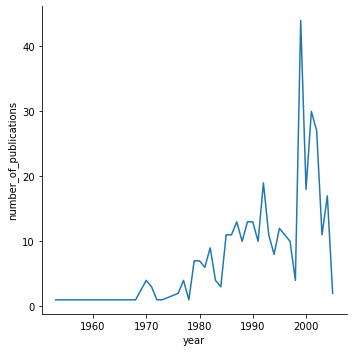

In [14]:
sns.relplot(x="year", y="number_of_publications", kind="line", data=v_2)

Third Visualization: **Food Group for each food**

In [8]:
v_3 = pd.read_sql("SELECT ndb_no as food_id, shrt_desc, fd.fdgrp_cd as id_group, fddrp_desc as group from food_des as fd, fd_group as fg WHERE fg.fdgrp_cd = fd.fdgrp_cd", conn)

In [9]:
v_3

,food_id,shrt_desc,id_group,group
0,01001,"BUTTER,WITH SALT",0100,Dairy and Egg Products
1,01002,"BUTTER,WHIPPED,WITH SALT",0100,Dairy and Egg Products
2,01003,"BUTTER OIL,ANHYDROUS",0100,Dairy and Egg Products
3,01004,"CHEESE,BLUE",0100,Dairy and Egg Products
4,01005,"CHEESE,BRICK",0100,Dairy and Egg Products
...,...,...,...,...
7141,80200,"FROG LEGS,RAW",1500,Finfish and Shellfish Products
7142,83110,"MACKEREL,SALTED",1500,Finfish and Shellfish Products
7143,90240,"SCALLOP,(BAY&SEA),CKD,STMD",1500,Finfish and Shellfish Products
7144,90560,"SNAIL,RAW",1500,Finfish and Shellfish Products
